In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# **Distance Functions**


In [ ]:
def euclidean(a, b):
  return np.sqrt(np.sum((a - b) ** 2))


def manhattan(a, b):
  return np.sum(np.abs(a - b))


def minkowski(a, b, p=3):
  return np.sum(np.abs(a - b) ** p) ** (1/p)


def cosine_distance(a, b):
  num = np.dot(a, b)
  den = np.linalg.norm(a) * np.linalg.norm(b)
  return 1 - (num / den)


def hamming(a, b):
  return np.sum(a != b)

DISTANCES = {
"euclidean": euclidean,
"manhattan": manhattan,
"minkowski": minkowski,
"cosine": cosine_distance,
"hamming": hamming
}

#**KNN CLassifier**

In [ ]:
class KNN:
  def __init__(self, k=3, distance="euclidean"):
    self.k = k
    self.distance_name = distance
    self.distance = DISTANCES[distance]


  def fit(self, X, y):
    self.X_train = X
    self.y_train = y


  def predict_one(self, x):
    dists = []
    for i in range(len(self.X_train)):
      d = self.distance(x, self.X_train[i])
      dists.append((d, self.y_train[i]))
    dists.sort(key=lambda z: z[0])
    k_nearest = [label for (_, label) in dists[:self.k]]
    return Counter(k_nearest).most_common(1)[0][0]


  def predict(self, X):
    return np.array([self.predict_one(x) for x in X])

#**Metrics**

In [ ]:
def accuracy(y_true, y_pred):
  return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred, labels):
  cm = np.zeros((len(labels), len(labels)), dtype=int)
  for i in range(len(y_true)):
    true = labels.index(y_true[i])
    pred = labels.index(y_pred[i])
    cm[true, pred] += 1
  return cm


def precision_recall(cm):
  precisions = []
  recalls = []
  for i in range(len(cm)):
    tp = cm[i, i]
    fp = np.sum(cm[:, i]) - tp
    fn = np.sum(cm[i, :]) - tp
    precision = tp / (tp + fp + 1e-10)
    recall = tp / (tp + fn + 1e-10)
    precisions.append(precision)
    recalls.append(recall)
  return precisions, recalls

# **Task 1: Breast Cancer Dataset**

In [ ]:
print("Loading data.csv...")
data = pd.read_csv("data.csv")

data = data.drop(columns=['id', 'Unnamed: 32'])
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})

X = data.drop(columns=['diagnosis']).values
Y = data['diagnosis'].values

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Train-test split (80-20)
n = len(X)
idx = np.random.permutation(n)
train_size = int(0.8 * n)
train_idx = idx[:train_size]
test_idx = idx[train_size:]

X_train, X_test = X[train_idx], X[test_idx]
Y_train, Y_test = Y[train_idx], Y[test_idx]

K_values = [3, 4, 9, 20, 47]
distance_names = ["euclidean", "manhattan", "minkowski", "cosine", "hamming"]

results = {}

for dist in distance_names:
  accs = []
  for k in K_values:
    knn = KNN(k=k, distance=dist)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    acc = accuracy(Y_test, Y_pred)
    accs.append(acc)
    print(f"Distance={dist}, K={k}, Accuracy={acc:.4f}")
  results[dist] = accs

Loading data.csv...
Distance=euclidean, K=3, Accuracy=0.9912
Distance=euclidean, K=4, Accuracy=0.9912
Distance=euclidean, K=9, Accuracy=0.9912
Distance=euclidean, K=20, Accuracy=0.9737
Distance=euclidean, K=47, Accuracy=0.9561
Distance=manhattan, K=3, Accuracy=0.9912
Distance=manhattan, K=4, Accuracy=0.9912
Distance=manhattan, K=9, Accuracy=0.9912
Distance=manhattan, K=20, Accuracy=0.9649
Distance=manhattan, K=47, Accuracy=0.9649
Distance=minkowski, K=3, Accuracy=0.9912
Distance=minkowski, K=4, Accuracy=0.9912
Distance=minkowski, K=9, Accuracy=0.9912
Distance=minkowski, K=20, Accuracy=0.9737
Distance=minkowski, K=47, Accuracy=0.9561
Distance=cosine, K=3, Accuracy=0.9912
Distance=cosine, K=4, Accuracy=0.9912
Distance=cosine, K=9, Accuracy=0.9825
Distance=cosine, K=20, Accuracy=0.9649
Distance=cosine, K=47, Accuracy=0.9561
Distance=hamming, K=3, Accuracy=0.7105
Distance=hamming, K=4, Accuracy=0.7368
Distance=hamming, K=9, Accuracy=0.7105
Distance=hamming, K=20, Accuracy=0.6842
Distance=h

# **Plot: K vs Accuracy**

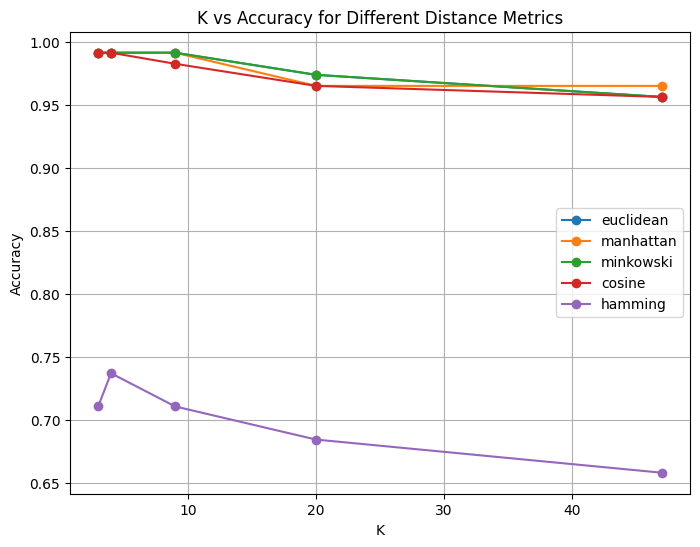

In [ ]:
plt.figure(figsize=(8,6))
for dist in distance_names:
  plt.plot(K_values, results[dist], marker='o', label=dist)


plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy for Different Distance Metrics")
plt.legend()
plt.grid(True)
plt.show()

# **Best Model Selection**

In [ ]:
best_acc = -1
best_k = None
best_dist = None

for dist in distance_names:
  for i, k in enumerate(K_values):
    if results[dist][i] > best_acc:
      best_acc = results[dist][i]
      best_k = k
      best_dist = dist

print("\nBest Model:")
print("Best K =", best_k)
print("Best Distance =", best_dist)
print("Best Accuracy =", best_acc)

knn_best = KNN(k=best_k, distance=best_dist)
knn_best.fit(X_train, Y_train)
Y_pred_best = knn_best.predict(X_test)

labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred_best, labels)
precisions, recalls = precision_recall(cm)

print("\nConfusion Matrix:")
print(cm)
print("Precision (B, M):", precisions)
print("Recall (B, M):", recalls)


Best Model:
Best K = 3
Best Distance = euclidean
Best Accuracy = 0.9912280701754386

Confusion Matrix:
[[75  0]
 [ 1 38]]
Precision (B, M): [np.float64(0.9868421052618594), np.float64(0.9999999999973683)]
Recall (B, M): [np.float64(0.9999999999986666), np.float64(0.974358974356476)]


# **Bonus Task: Decision Boundary**

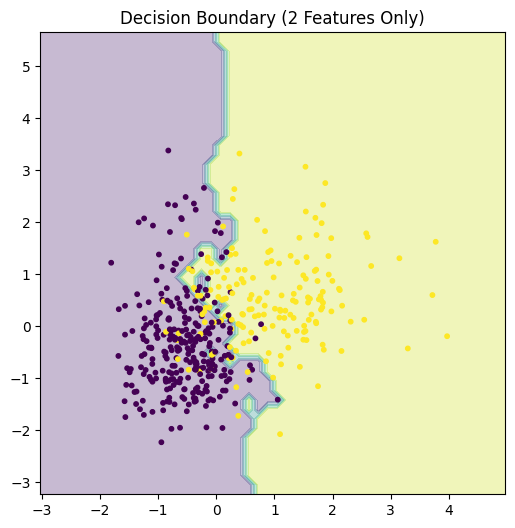

In [ ]:
X2 = X[:, :2]
X2_train, X2_test = X2[train_idx], X2[test_idx]

knn2 = KNN(k=best_k, distance=best_dist)
knn2.fit(X2_train, Y_train)

x_min, x_max = X2[:,0].min()-1, X2[:,0].max()+1
y_min, y_max = X2[:,1].min()-1, X2[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
np.linspace(y_min, y_max, 50))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = knn2.predict(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X2_train[:,0], X2_train[:,1], c=Y_train, s=10)
plt.title("Decision Boundary (2 Features Only)")
plt.show()

In [ ]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xzf cifar-10-python.tar.gz

--2026-01-22 05:28:48--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  12.1MB/s    in 14s     

2026-01-22 05:29:04 (11.6 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [ ]:
import pickle
import numpy as np

def load_batch(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict[b'data'], dict[b'labels']

# Load only one batch (for speed)
X_all, y_all = load_batch("cifar-10-batches-py/data_batch_1")

# Take a small subset (important!)
N = 2000   # you can mention this in report
X = X_all[:N]
y = np.array(y_all[:N])

# Normalize pixel values
X = X / 255.0

print("Dataset shape:", X.shape)

Dataset shape: (2000, 3072)


In [ ]:
n = len(X)
idx = np.random.permutation(n)

train_size = int(0.8 * n)
train_idx = idx[:train_size]
test_idx = idx[train_size:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (1600, 3072) Test: (400, 3072)


In [ ]:
K_values = [3, 4, 9, 20]
distance_names = ["euclidean", "manhattan", "minkowski", "cosine"]

results_task2 = {}

for dist in distance_names:
    accs = []
    for k in K_values:
        knn = KNN(k=k, distance=dist)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy(y_test, y_pred)
        accs.append(acc)
        print(f"CIFAR-10 | Distance={dist}, K={k}, Accuracy={acc:.4f}")
    results_task2[dist] = accs

CIFAR-10 | Distance=euclidean, K=3, Accuracy=0.2725
CIFAR-10 | Distance=euclidean, K=4, Accuracy=0.2600
CIFAR-10 | Distance=euclidean, K=9, Accuracy=0.2975
CIFAR-10 | Distance=euclidean, K=20, Accuracy=0.2625
CIFAR-10 | Distance=manhattan, K=3, Accuracy=0.2925
CIFAR-10 | Distance=manhattan, K=4, Accuracy=0.3075
CIFAR-10 | Distance=manhattan, K=9, Accuracy=0.3075
CIFAR-10 | Distance=manhattan, K=20, Accuracy=0.2950
CIFAR-10 | Distance=minkowski, K=3, Accuracy=0.2325
